**PIA: Entrenamiento de una red convolucional**

Alan Rodolfo Guerra Lopez 1923358 IMTC N1

**IMPORTAR LIBRERIAS**

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers, regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import glob

**IMPORTAR DATASET DESDE DRIVE**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

# Ruta al archivo ZIP en Google Drive
ruta_zip = '/content/drive/My Drive/Car_Brands_Ajustado_V2.zip'

# Directorio de extracción
directorio_extraccion = '/content/Car_Brands_Ajustado_V2.zip'

with zipfile.ZipFile(ruta_zip, 'r') as zip_ref:
    zip_ref.extractall(directorio_extraccion)

**Preprocesamiento aplicado a las imagenes**

In [ ]:
imagenes = []
etiquetas = []


# Ruta de la carpeta principal
carpeta_principal = '/content/drive/MyDrive/imgs'

# Patrón para encontrar todas las subcarpetas dentro de la carpeta principal
patron = os.path.join(carpeta_principal, '*')

# Utiliza glob para encontrar todas las subcarpetas que coinciden con el patrón
subcarpetas = glob.glob(patron)

# Itera sobre las subcarpetas encontradas
z = 0
for subcarpeta in subcarpetas:

    if os.path.isdir(subcarpeta):
        print('Subcarpeta:', subcarpeta)
        # Haz algo con la subcarpeta si es necesario

        for x in glob.iglob(f'{subcarpeta}/*.jpg'):
          print(x)
          test_image = cv2.imread(x)

          # Formato de imagen
          img_resized = cv2.resize(test_image, (28,28), )

          # Guardar imagenes y etiquetas
          arreglo_imagen = np.array(img_resized)
          imagenes.append(arreglo_imagen)
          etiquetas.append(z)
    z += 1


Subcarpeta: /content/drive/MyDrive/imgs/Acura
/content/drive/MyDrive/imgs/Acura/Acura_019.jpg
/content/drive/MyDrive/imgs/Acura/Acura_012.jpg
/content/drive/MyDrive/imgs/Acura/Acura_001.jpg
/content/drive/MyDrive/imgs/Acura/Acura_000.jpg
/content/drive/MyDrive/imgs/Acura/Acura_008.jpg
/content/drive/MyDrive/imgs/Acura/Acura_002.jpg
/content/drive/MyDrive/imgs/Acura/Acura_011.jpg
/content/drive/MyDrive/imgs/Acura/Acura_009.jpg
/content/drive/MyDrive/imgs/Acura/Acura_010.jpg
/content/drive/MyDrive/imgs/Acura/Acura_006.jpg
/content/drive/MyDrive/imgs/Acura/Acura_007.jpg
/content/drive/MyDrive/imgs/Acura/Acura_005.jpg
/content/drive/MyDrive/imgs/Acura/Acura_003.jpg
/content/drive/MyDrive/imgs/Acura/Acura_004.jpg
/content/drive/MyDrive/imgs/Acura/Acura_071.jpg
/content/drive/MyDrive/imgs/Acura/Acura_069.jpg
/content/drive/MyDrive/imgs/Acura/Acura_070.jpg
/content/drive/MyDrive/imgs/Acura/Acura_066.jpg
/content/drive/MyDrive/imgs/Acura/Acura_063.jpg
/content/drive/MyDrive/imgs/Acura/Acura_06

In [ ]:
etiquetas = np.array(etiquetas)

In [ ]:
images = np.array(imagenes)

In [ ]:
np.shape(images)

(4607, 28, 28, 3)

In [ ]:
len(etiquetas)

4607

In [ ]:
etiquetas[20]

0

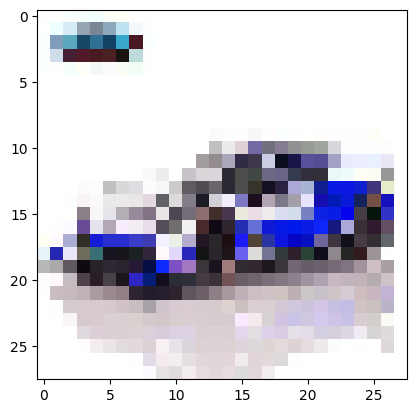

In [ ]:
plt.imshow(imagenes[20])

In [ ]:
arreglo_imagen = np.array(img_resized)
imagenes.append(arreglo_imagen)

In [ ]:
if len(imagenes) > len(etiquetas):
    imagenes = imagenes[:len(etiquetas)]
elif len(etiquetas) > len(imagenes):
    etiquetas = etiquetas[:len(imagenes)]

print(f"Longitud sincronizada de imagenes: {len(imagenes)}")
print(f"Longitud sincronizada de etiquetas: {len(etiquetas)}")

from sklearn.model_selection import train_test_split

train_images, test_images, train_labels, test_labels = train_test_split(
    imagenes, etiquetas, test_size=0.2, random_state=42
)

Longitud sincronizada de imagenes: 4607
Longitud sincronizada de etiquetas: 4607


**Asignacion de Clases y Verificacion de datos**

In [ ]:
class_names = ['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley','BMW', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet',
               'Chrysler', 'Citroen', 'Daewoo', 'Dodge', 'Ferrari','Fiat', 'Ford', 'Genesis', 'GMC', 'Honda',
               'Hudson', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep','Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Maserati',
                'Mazda', 'Mercedes-Benz', 'MG', 'Mini','Mitsubishi', 'Nissan', 'Oldsmobile', 'Peugeot', 'Pontiac',
               'Porsche', 'Ram Trucks', 'Renault', 'Saab', 'Studebaker','Subaru', 'Suzuki', 'Tesla', 'Toyota', 'Volkswagen'
               'Volvo']
print(class_names)

['Acura', 'Alfa Romeo', 'Aston Martin', 'Audi', 'Bentley', 'BMW', 'Bugatti', 'Buick', 'Cadillac', 'Chevrolet', 'Chrysler', 'Citroen', 'Daewoo', 'Dodge', 'Ferrari', 'Fiat', 'Ford', 'Genesis', 'GMC', 'Honda', 'Hudson', 'Hyundai', 'Infiniti', 'Jaguar', 'Jeep', 'Kia', 'Land Rover', 'Lexus', 'Lincoln', 'Maserati', 'Mazda', 'Mercedes-Benz', 'MG', 'Mini', 'Mitsubishi', 'Nissan', 'Oldsmobile', 'Peugeot', 'Pontiac', 'Porsche', 'Ram Trucks', 'Renault', 'Saab', 'Studebaker', 'Subaru', 'Suzuki', 'Tesla', 'Toyota', 'VolkswagenVolvo']


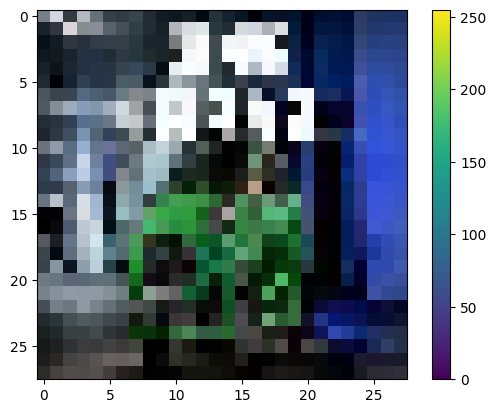

In [ ]:
plt.figure()
plt.imshow(train_images[30])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_labels[30]

16

In [ ]:
# Convertir las listas a arrays de NumPy
train_images = np.array(train_images)
test_images = np.array(test_images)

# Normalizar las imágenes
train_images = train_images / 255.0
test_images = test_images / 255.0

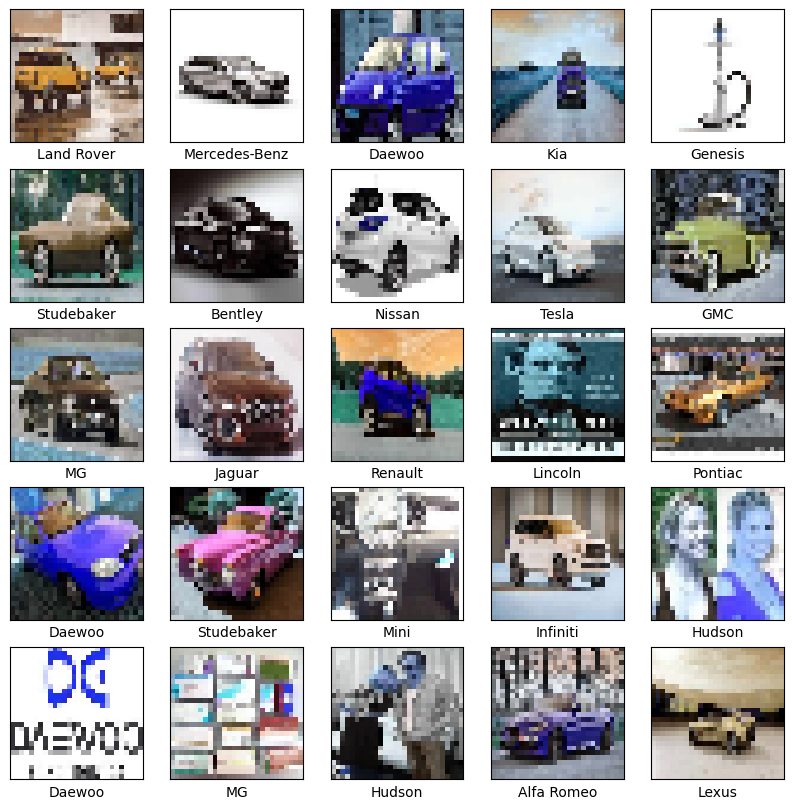

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

**Selección de Modelo y Entrenamiento**

In [ ]:
model = models.Sequential()

# Capas Convolucionales y de Pooling
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.25))

# Aplanar y Capas Densas
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(14))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 28, 28, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 12, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 12, 12, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 4, 4, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 14)                  │           3,598 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 229,070 (894.80 KB)

 Trainable params: 228,622 (893.05 KB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28, 3)),  # Ajuste para imágenes RGB
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=20,
                    validation_data=(test_images, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.7638 - loss: 6.0796 - val_accuracy: 0.8558 - val_loss: 0.5931
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8611 - loss: 0.5552 - val_accuracy: 0.8974 - val_loss: 0.4040
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9045 - loss: 0.3707 - val_accuracy: 0.9148 - val_loss: 0.3392
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9082 - loss: 0.3603 - val_accuracy: 0.9169 - val_loss: 0.3542
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9168 - loss: 0.3322 - val_accuracy: 0.9231 - val_loss: 0.3487
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9207 - loss: 0.3237 - val_accuracy: 0.9187 - val_loss: 0.3591
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.9208 - loss: 0.3156 - val_accuracy: 0.9201 - val_loss: 0.3868
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9214 - loss: 0.

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9170 - loss: 0.4400

Test accuracy: 0.9169999957084656


**Predicciones y Resultados**

In [ ]:
probability_model = tf.keras.Sequential([model,
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(14))
  plt.yticks([])
  thisplot = plt.bar(range(14), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

In [ ]:
predictions = model.predict(test_images)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [ ]:
import numpy as np

test_labels = np.array(test_labels)  # Asegurar que es un array de NumPy


In [ ]:
print(f"Shape de predictions[i]: {predictions[i].shape}")
print(f"Shape de test_labels: {test_labels.shape}")


Shape de predictions[i]: (10,)
Shape de test_labels: (10000,)


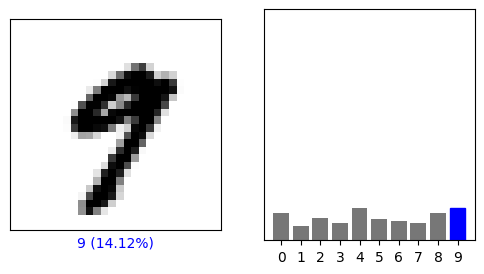

In [ ]:
i = 20
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

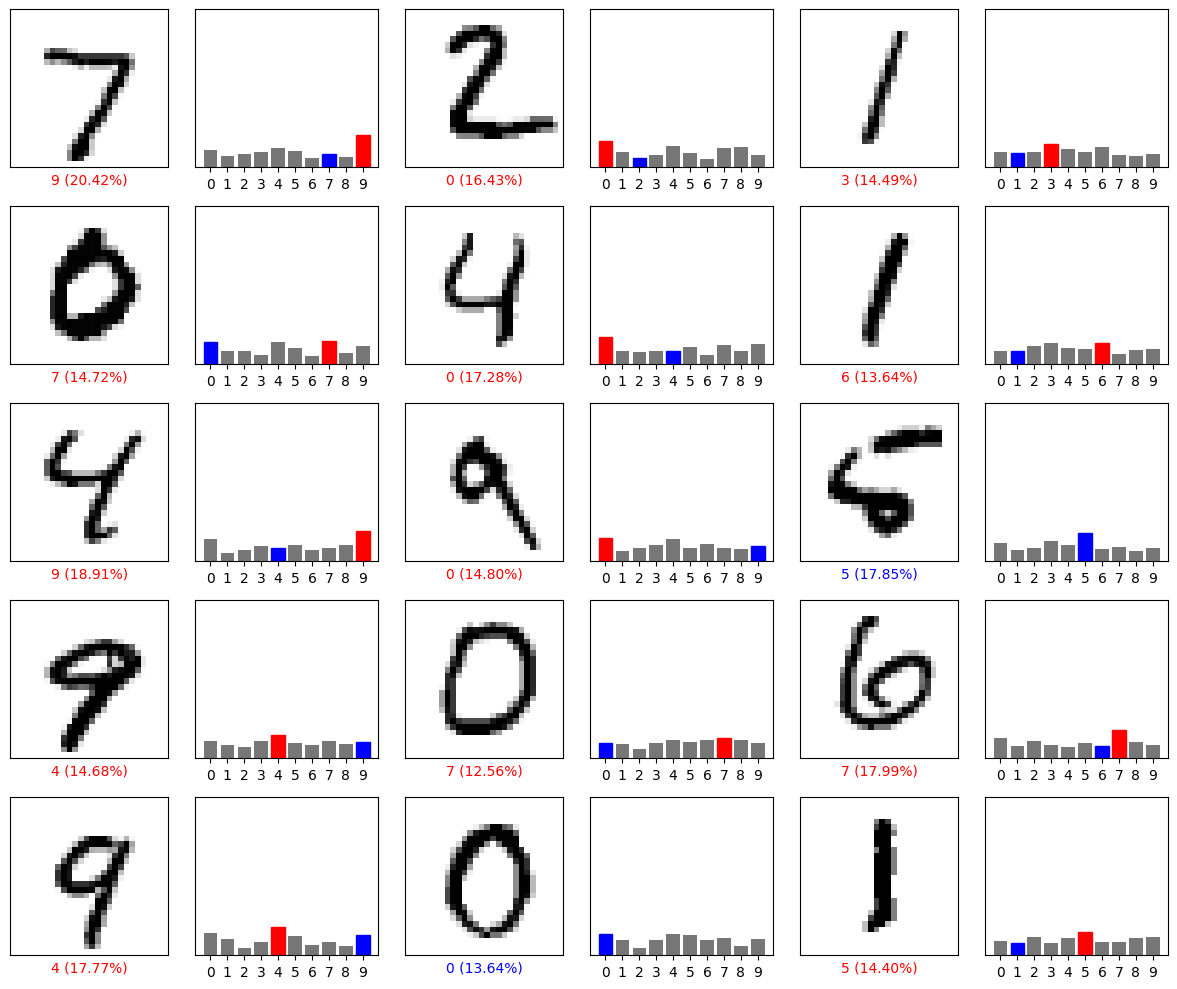

In [ ]:
# El color azul indica una predicción correcta y el color rojo indica una predicción incorrecta.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

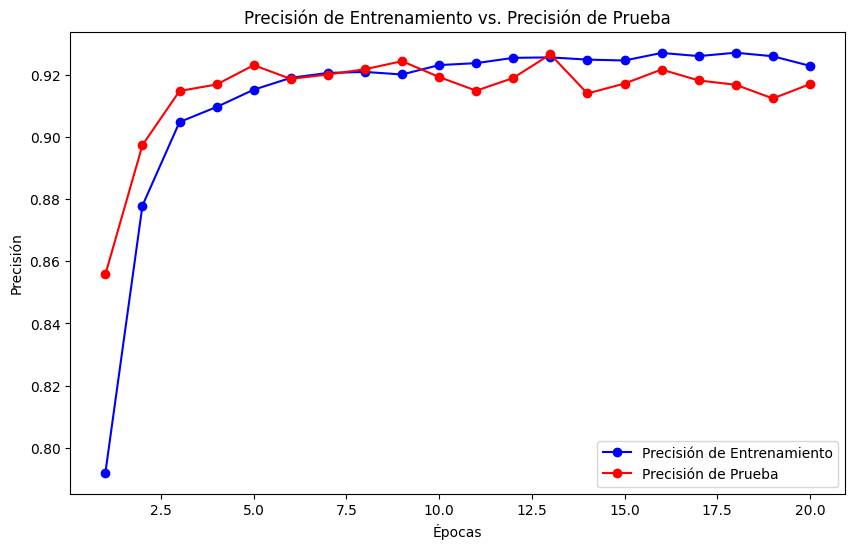

In [ ]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_acc) + 1)

plt.figure(figsize=(10, 6))
plt.plot(epochs, train_acc, 'bo-', label='Precisión de Entrenamiento')
plt.plot(epochs, val_acc, 'ro-', label='Precisión de Prueba')
plt.title('Precisión de Entrenamiento vs. Precisión de Prueba')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()
plt.show()